# Transport Accessibility and Air Quality Analysis – Dartford

This notebook contains the initial data loading, exploration, and preprocessing steps
for analysing public transport accessibility and proximity to major roads in Dartford, Kent.

The aim is to establish a clean, reproducible foundation for subsequent spatial analysis
and visualisation.


In [1]:
# Importing libraries and Enviornment
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


## Data Sources Used

- Bus stop locations (NapTAN)
- Major road networks (OpenStreetMap)
- Dartford boundary shapefile (ONS)
- Index of Multiple Deprivation (LSOA level)

All datasets are publicly available UK sources.

In [2]:
# loading dartford boundary
dartford_boundary = gpd.read_file(
    "../data/raw/dartford_boundary/dartford_boundary.geojson"
)

dartford_boundary.head()

,FID,LAD25CD,LAD25NM,LAD25NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,127,E07000107,Dartford,,556167,172917,0.245276,51.433735,942a837d-54cf-4cc8-a91f-595661c5820b,"POLYGON ((0.25565 51.46254, 0.27652 51.45357, ..."


In [3]:
# sanity check for dartford boundary 

dartford_boundary.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
# Loading national bus stops data file
naptan = pd.read_csv("../data/raw/naptan/Stops.csv")

# first 5 rows of bus stop data
naptan.head() 

C:\Users\akua4\AppData\Local\Temp\ipykernel_11644\2184657458.py:2: DtypeWarning: Columns (1,2,6,8,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  naptan = pd.read_csv("../data/raw/naptan/Stops.csv")


,ATCOCode,NaptanCode,PlateCode,CleardownCode,CommonName,CommonNameLang,ShortCommonName,ShortCommonNameLang,Landmark,LandmarkLang,...,TimingStatus,DefaultWaitTime,Notes,NotesLang,AdministrativeAreaCode,CreationDateTime,ModificationDateTime,RevisionNumber,Modification,Status
0,0100BRP90317,bstjada,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2009-08-25T00:00:00,2019-08-06T11:10:46,49.0,new,active
1,0100BRP90318,bstgwtd,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2009-08-25T00:00:00,2024-01-12T11:30:59,86.0,new,active
2,0100BRP90310,bstgwpa,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2009-08-25T00:00:00,2023-04-21T18:02:19,99.0,new,active
3,0100BRP90311,bstgwpm,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2009-08-25T00:00:00,2019-09-13T10:41:38,73.0,new,active
4,010000056,bstpjgw,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2019-08-06T00:00:00,2025-04-17T09:38:46,120.0,new,active


In [5]:
naptan.columns

Index(['ATCOCode', 'NaptanCode', 'PlateCode', 'CleardownCode', 'CommonName',
       'CommonNameLang', 'ShortCommonName', 'ShortCommonNameLang', 'Landmark',
       'LandmarkLang', 'Street', 'StreetLang', 'Crossing', 'CrossingLang',
       'Indicator', 'IndicatorLang', 'Bearing', 'NptgLocalityCode',
       'LocalityName', 'ParentLocalityName', 'GrandParentLocalityName', 'Town',
       'TownLang', 'Suburb', 'SuburbLang', 'LocalityCentre', 'GridType',
       'Easting', 'Northing', 'Longitude', 'Latitude', 'StopType',
       'BusStopType', 'TimingStatus', 'DefaultWaitTime', 'Notes', 'NotesLang',
       'AdministrativeAreaCode', 'CreationDateTime', 'ModificationDateTime',
       'RevisionNumber', 'Modification', 'Status'],
      dtype='object')

## Initial Data Checks

This section checks geometry validity, coordinate systems, and missing values.

In [6]:
# filtering bus stops only using the column 'StopType'
bus_stops = naptan[naptan["StopType"] == "BCT"].copy()

bus_stops.shape

(415484, 43)

In [7]:
# converting from csv to GeoDataFrame

bus_stops_gdf = gpd.GeoDataFrame(
    bus_stops,
    geometry=gpd.points_from_xy(
        bus_stops["Longitude"],
        bus_stops["Latitude"]
    ),
    crs="EPSG:4326"
)

bus_stops_gdf.head()

,ATCOCode,NaptanCode,PlateCode,CleardownCode,CommonName,CommonNameLang,ShortCommonName,ShortCommonNameLang,Landmark,LandmarkLang,...,DefaultWaitTime,Notes,NotesLang,AdministrativeAreaCode,CreationDateTime,ModificationDateTime,RevisionNumber,Modification,Status,geometry
0,0100BRP90317,bstjada,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,NaN,NaN,NaN,9,2009-08-25T00:00:00,2019-08-06T11:10:46,49.0,new,active,POINT (-2.58302 51.44827)
1,0100BRP90318,bstgwtd,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,NaN,NaN,NaN,9,2009-08-25T00:00:00,2024-01-12T11:30:59,86.0,new,active,POINT (-2.58508 51.44882)
2,0100BRP90310,bstgwpa,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,NaN,NaN,NaN,9,2009-08-25T00:00:00,2023-04-21T18:02:19,99.0,new,active,POINT (-2.58579 51.44902)
3,0100BRP90311,bstgwpm,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,NaN,NaN,NaN,9,2009-08-25T00:00:00,2019-09-13T10:41:38,73.0,new,active,POINT (-2.58560 51.45014)
4,010000056,bstpjgw,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,NaN,NaN,NaN,9,2019-08-06T00:00:00,2025-04-17T09:38:46,120.0,new,active,POINT (-2.58489 51.44967)


In [8]:
# checking to match dartford boundary crs
bus_stops_gdf.crs 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Defining Study Area

In this section, the data is clipped to create a new dataset containing only bus stops in Dartford.


In [9]:
# spatial clip to Dartford
bus_stops_dartford = gpd.clip(bus_stops_gdf, dartford_boundary)


#checking columns and rows
bus_stops_dartford.shape    

(538, 44)

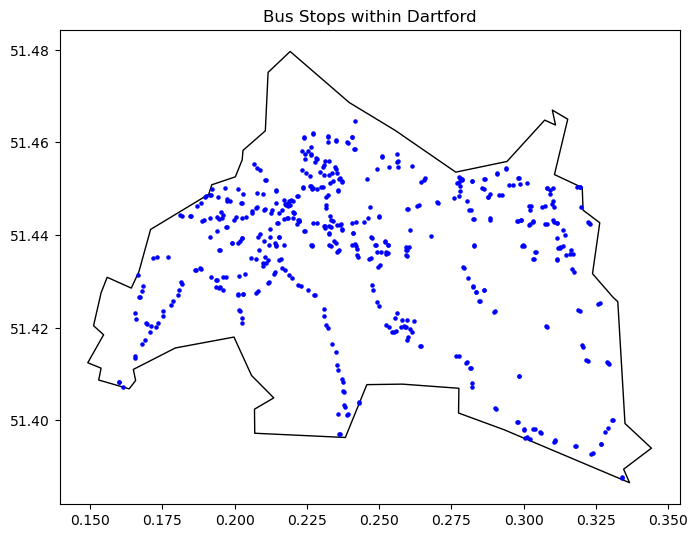

In [10]:
## Visualising the data

fig, ax = plt.subplots(figsize=(8, 8))

dartford_boundary.plot(
    ax=ax,
    color="none",
    edgecolor="black"
)

bus_stops_dartford.plot(
    ax=ax,
    color="blue",
    markersize=5
)

plt.title("Bus Stops within Dartford")
plt.show()


## Column Selection

The NaPTAN dataset contains a large number of attributes that are not required for
transport accessibility analysis. At this stage, only essential identifiers and
spatial attributes are retained to improve clarity and efficiency. Additional
attributes can be reintroduced if required in later stages of the project.


In [11]:
columns_to_keep = [
    "ATCOCode",
    "CommonName",
    "StopType",
    "Latitude",
    "Longitude",
    "geometry"
]


In [12]:
bus_stops_dartford_clean = bus_stops_dartford[columns_to_keep].copy()


In [13]:
bus_stops_dartford_clean.head()
bus_stops_dartford_clean.columns

Index(['ATCOCode', 'CommonName', 'StopType', 'Latitude', 'Longitude',
       'geometry'],
      dtype='object')

In [14]:
bus_stops_dartford_clean.to_file(
    "../data/processed/bus_stops_dartford_clean.geojson",
    driver="GeoJSON"
)

## Next Steps

The next stage of this project will:
- Estimate walkable access to bus stops using buffer analysis
- Analyse proximity to major roads as a proxy for air quality exposure
- Join results with deprivation data (IMD)
- Develop an interactive dashboard for public use
